<a href="https://colab.research.google.com/github/coding-dojo-data-science/curriculum-assets-ds-pt-online/blob/main/Notebooks/ds-fundamentals/Preparing_Measures_of_Central_Tendency_Annotated_Plots_for_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annotating Distributions (Measures of Central Tendency)

- 03/16/23 Copy
- Using to generate Stack 1 images for LP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-muted','fivethirtyeight'])
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (12,6)

<ipython-input-1-a88c9a4c3bf5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-muted','fivethirtyeight'])


In [3]:
london_weather = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(london_weather)#, parse_dates=['date'],  index_col='date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:

df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [5]:
df = df.set_index('date')
df


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


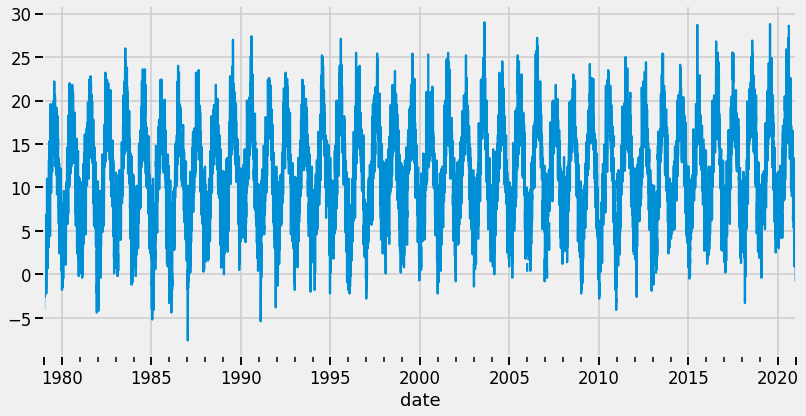

In [6]:
df['mean_temp'].plot();

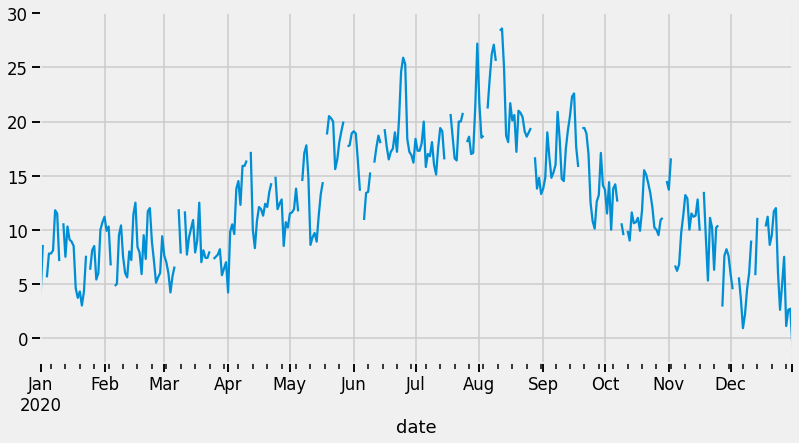

In [7]:
ts = df.loc['2020','mean_temp']
ts.plot();

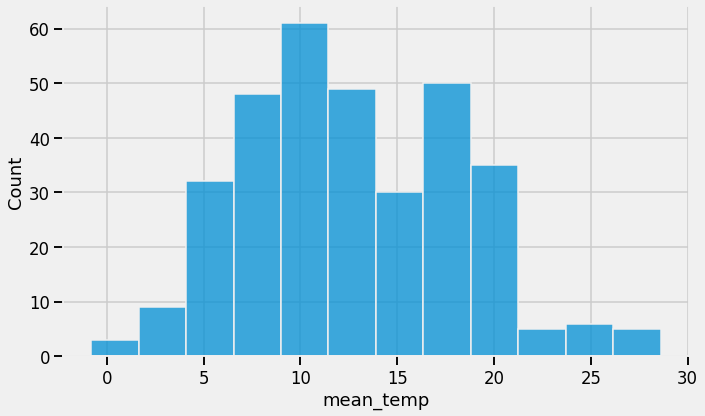

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(ts, ax = ax);

In [9]:
# Find the mean and round to 2 decimal places for readability
mean = ts.mean().round(2)
mean

12.72

### Plot - No Annotations

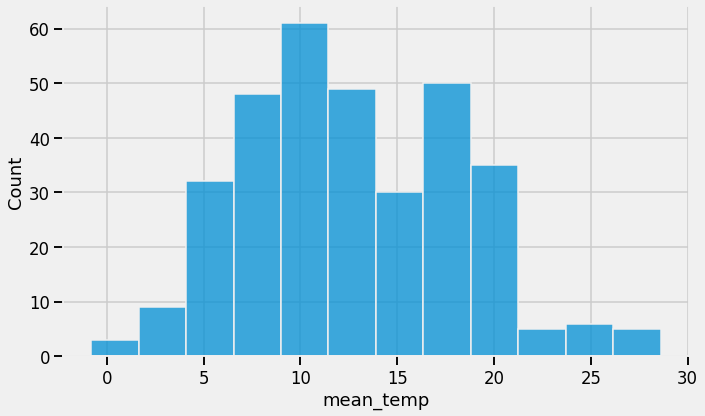

In [10]:
# y = df['Avg']
# y= sample['Avg Salary']
y = ts.copy()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(y,ax=ax);#,stat='probability')

In [12]:
def plot_annotated_histogram_mean(df, col=None, bins='auto'):
  if col is None:
    data = df.copy()
  else:
    data= df[col].copy()
  
  ## Saving the mean of the column
  mean = data.mean().round(2)

  fig,ax = plt.subplots(figsize=(10,6))
  sns.histplot(data, ax=ax, bins=bins)
  ax.axvline(mean, color='red',label=f'Mean {mean}');
  ax.set_title(col)
  ax.legend();

  return fig, ax


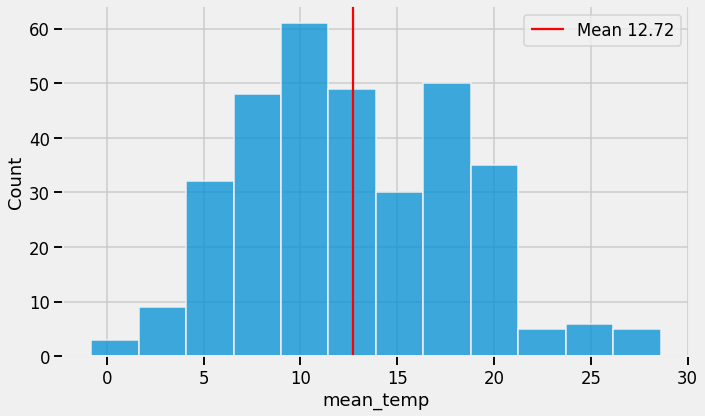

In [13]:

fig,ax = plot_annotated_histogram_mean(ts)

In [14]:

def set_labels(ax, xlabel="Temperature (C)", ylabel='# of Days',
               title='Distribution of Temperature (C)'):
  ax.set(xlabel=xlabel, ylabel=ylabel,title=title)


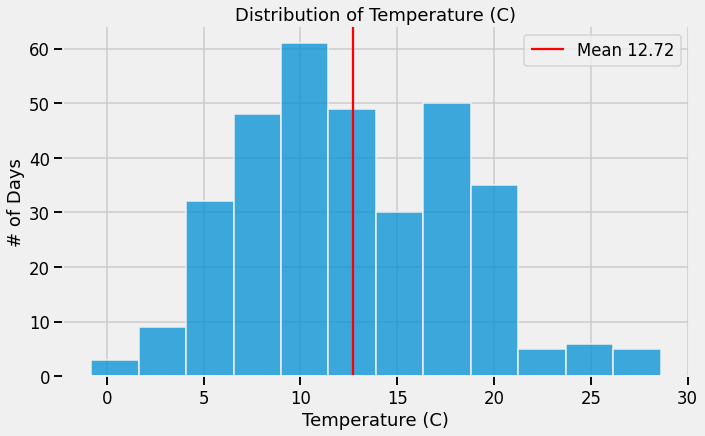

In [15]:
fig, ax = plot_annotated_histogram_mean(ts)
set_labels(ax)

In [16]:
## Updating our function to add the median
def plot_annotated_histogram_mean_med(df, col=None, bins='auto'):

  if col is None:
    data = df.copy()

  else:
    data= df[col].copy()
  
  ## Saving the mean of the column
  mean = data.mean().round(2)
  median = data.median().round(2)

  fig,ax = plt.subplots(figsize=(10,6))
  sns.histplot(data, ax=ax,bins=bins)
  ax.axvline(mean, color='red',label=f'Mean {mean}');
  ax.set_title(col)
  ax.legend();
  ax.axvline(median, color = 'darkgreen',  label = f'Median: {median}',
               ls='--', lw=3)
    
  ax.legend();

  return fig, ax



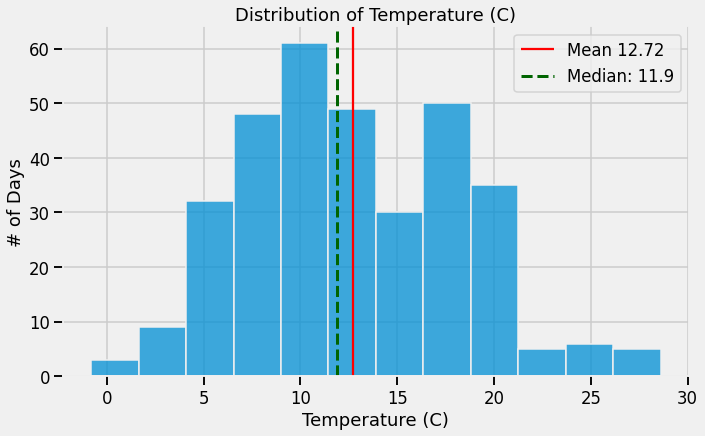

In [17]:
fig,ax = plot_annotated_histogram_mean_med(ts)#, col='Income')
set_labels(ax)

## ADMIN ONLY: Adding mode for Measures of Centrality Lesson

In [18]:
import statistics as st
# from statistics import ode
# col ='Income'
st.mode(ts)#df[col])

6.0

In [19]:
test = ['a','a','b','b','c','d','e']
st.mode(test)

'a'

In [20]:


## Updating our function to add the median
def plot_annotated_histogram_final(df, col=None, bins='auto'):

  if col is None:
    data = df.copy()

  else:
    data= df[col].copy()
  
  ## Saving the mean of the column
  mean = data.mean().round(2)
  median = data.median().round(2)
  mode = st.mode(data)
  # mode = data.value_counts().head(1).index

  fig,ax = plt.subplots(figsize=(10,6))
  sns.histplot(data, ax=ax, bins=bins)
  ax.axvline(mean, color='red',label=f'Mean {mean}');
  ax.set_title(col)
  ax.legend();
  ax.axvline(median, color = 'darkgreen',  label = f'Median: {median}',
               ls='--', lw=3)
        
  ax.axvline(mode, color = 'darkorange',  label = f'Mode: {mode}',
               ls='--', lw=3)
    
    
  ax.legend();

  return fig, ax



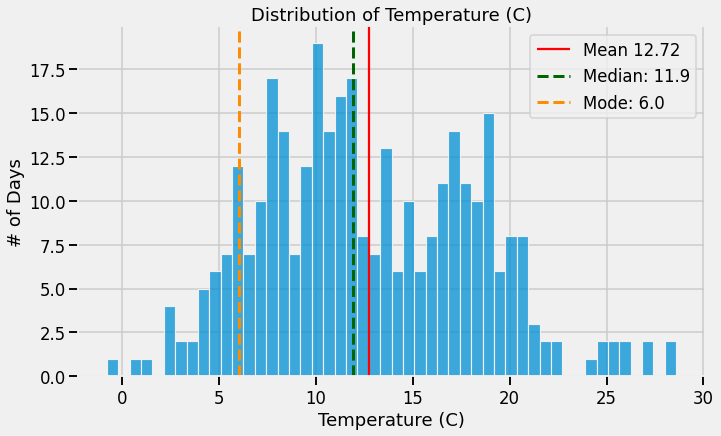

In [21]:

fig,ax = plot_annotated_histogram_final(ts,bins=50)#df, "Initial_days")
set_labels(ax)

# COMBINED USE OF FUNCTIONS FOR RAPID ITERATIONS

In [22]:

df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


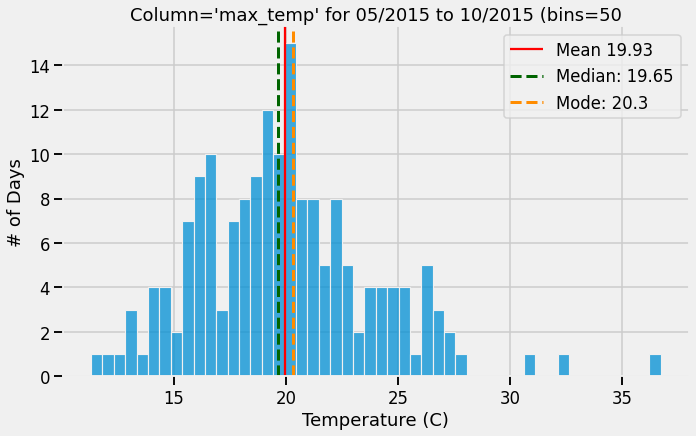

In [23]:
## SELECT DATES AND COLUMN HERE
START, END  = '05/2015', '10/2015'
COL = 'max_temp'
ts = df.loc[START:END,COL]
BINS = 50

fig, ax= plot_annotated_histogram_final(ts, bins=BINS)
ax.set(title=f"Column='{COL}' for {START} to {END} (bins={BINS}")
ax.set(xlabel="Temperature (C)", ylabel='# of Days')
plt.show()


### Finding the Best Column/Times/Bins

In [24]:
def select_data(df, START='2020', END='2021', COL = 'mean_temp',  BINS = 'auto'):
  ## SELECT DATES AND COLUMN HERE
  ts = df.loc[START:END,COL]

  fig, ax= plot_annotated_histogram_final(ts, bins=BINS)
  ax.set(title=f"Column='{COL}'\nfor {START} - {END}")
  
  ax.set(xlabel=f"Temperature (C) (bins={BINS})", ylabel='# of Days')
  # plt.show()
  return fig, ax


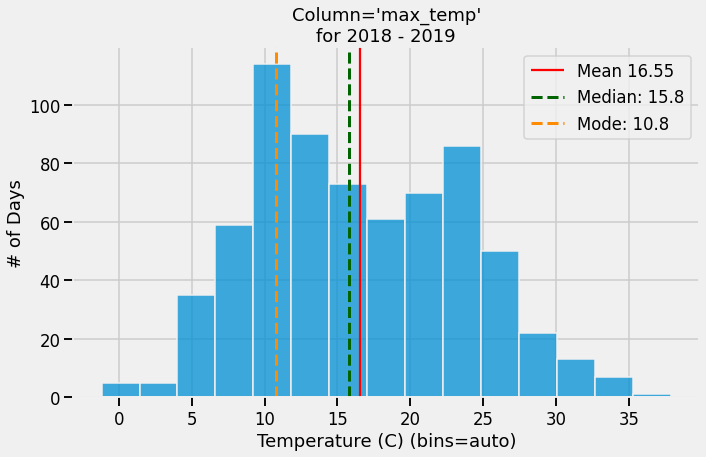

In [25]:
PARAMS = dict(START='2018', END='2019',COL = 'max_temp')#,  BINS = 50)
select_data(df, **PARAMS);

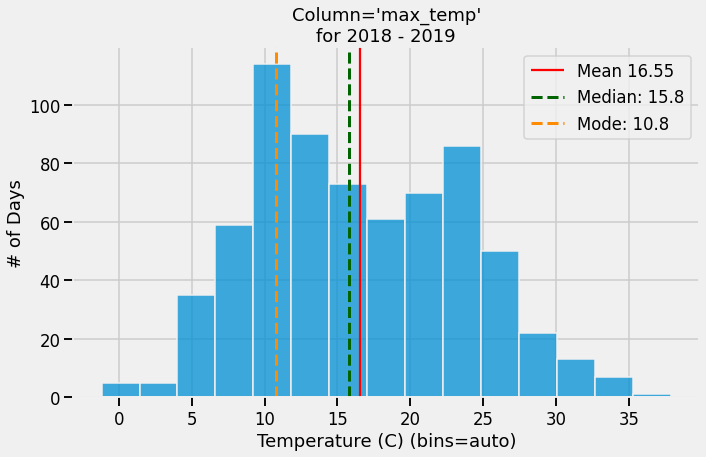

In [26]:
BEST_PARAMS = dict(START='2018', END='2019',COL = 'max_temp', BINS='auto')
select_data(df, **BEST_PARAMS);

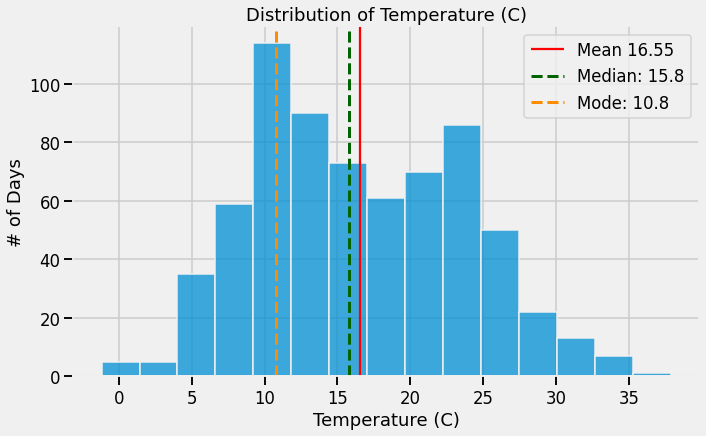

In [27]:
ts = df.loc[BEST_PARAMS['START']:BEST_PARAMS['END'], BEST_PARAMS['COL']]
fig,ax = plot_annotated_histogram_final(ts);
set_labels(ax)

# Making Final Figures for LP

In [83]:
import os
# def update_fname(fname):
#   if os.path.exists(fname)==True:
#     base, ext = os.path.splitext(fname)
#     ext = ext.replace('.','')

#     if '--' in base:
#       basename,num = base.split('--')
#       new_num = int(num) +1 
#       fname_out = f"{basename}--{new_num}.{ext}"
#       print(f"fname_out={fname_out}")
#     else:
#       new_num=1
#       fname_out = f"{base}--{new_num}.{ext}"

#     update_fname(fname_out)
#   else: 
#     print(f"fname={fname}")
#     return fname

def save_fig(fig, fname = 'figure.png', bbox_inches='tight',dpi=300):
  import os
  dirname = os.path.dirname(fname)
  if os.path.exists(dirname) == False:
    os.makedirs(dirname, exist_ok=True)
  # final_fname = update_fname(fname)
  fig.savefig(fname,bbox_inches =bbox_inches, dpi=dpi)
  print(f"[i] Image saved as {fname}")

In [84]:
# import os
# # fname = "Images/fig1.png"
# os.path.dirname(fname)

[i] Image saved as Images/plain_histogram.png


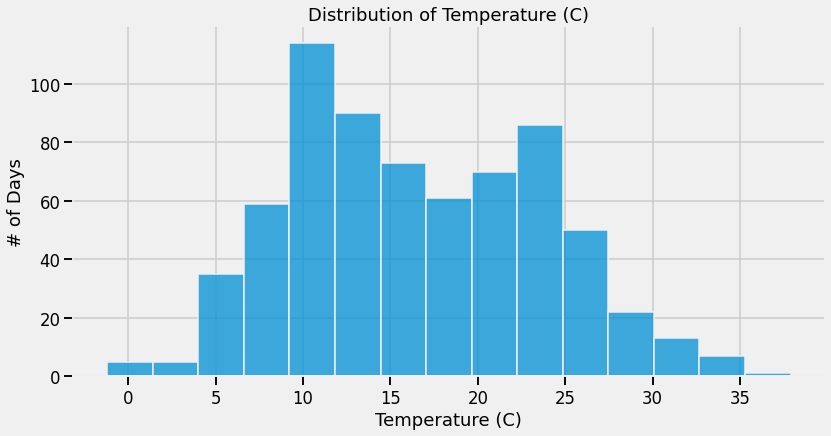

In [85]:
ax = sns.histplot(ts, bins=BEST_PARAMS['BINS'])
fig_orig = ax.get_figure()

set_labels(ax)
save_fig(fig_orig,fname='Images/plain_histogram.png')

[i] Image saved as Images/hist-mean.png


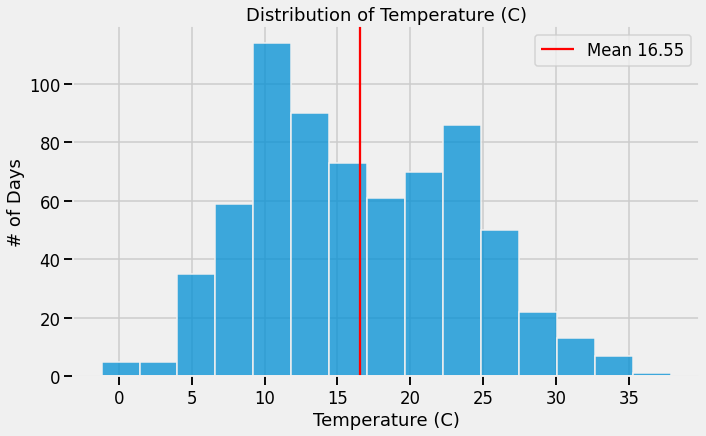

In [86]:
fig,ax = plot_annotated_histogram_mean(ts,bins=BEST_PARAMS['BINS'])
set_labels(ax)
save_fig(fig,fname='Images/hist-mean.png')

[i] Image saved as Images/hist-median.png


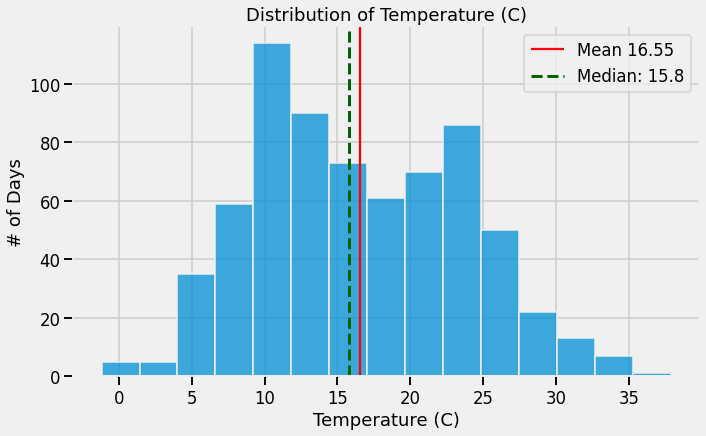

In [87]:
fig,ax = plot_annotated_histogram_mean_med(ts,bins=BEST_PARAMS['BINS'])
# ax.set(xlabel="Temperature (C)", ylabel='# of Days')
set_labels(ax)
save_fig(fig, fname='Images/hist-median.png')

[i] Image saved as Images/hist-final.png


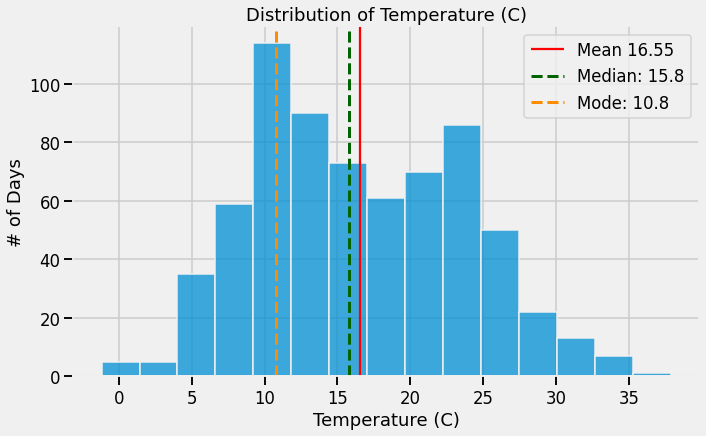

In [88]:
fig,ax = plot_annotated_histogram_final(ts,bins=BEST_PARAMS['BINS'])
set_labels(ax)
save_fig(fig, fname='Images/hist-final.png')

In [94]:

zip_folder = "Images/"
zip_fname = 'images.zip'

In [95]:
from zipfile import ZipFile
import glob
files_to_zip = glob.glob(zip_folder+"*")
files_to_zip

['Images/hist-final.png',
 'Images/hist-mean.png',
 'Images/hist-median.png',
 'Images/plain_histogram.png']

In [96]:

with ZipFile(zip_fname,mode='w') as zfile:
  for fname in files_to_zip:
    zfile.write(fname)
